In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets, linear_model, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import math
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [4]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
trainCopy=train.copy()
testCopy=test.copy()
train=shuffle(train)

In [5]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
32708,60453,Operations,region_26,Bachelor's,m,sourcing,2,26,NaN,1,0,0,91,1
23263,53010,Procurement,region_10,Master's & above,m,other,1,37,5.0,8,1,0,74,0
52290,26053,Procurement,region_31,Bachelor's,f,other,1,29,3.0,5,1,0,71,0
41868,14319,Operations,region_12,Master's & above,f,other,1,43,5.0,13,1,0,51,0
34907,48263,Technology,region_26,Bachelor's,m,referred,1,29,5.0,2,1,0,84,0


In [6]:
train.drop(['employee_id'],axis=1,inplace=True)
test.drop(['employee_id'],axis=1,inplace=True)
train.shape,test.shape

((54808, 13), (23490, 12))

In [7]:
train.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [8]:
train.nunique()

department               9
region                  34
education                3
gender                   2
recruitment_channel      3
no_of_trainings         10
age                     41
previous_year_rating     5
length_of_service       35
KPIs_met >80%            2
awards_won?              2
avg_training_score      61
is_promoted              2
dtype: int64

In [9]:

labels = train['recruitment_channel'].astype('category').cat.categories.tolist()
recChannelMap = {'recruitment_channel' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

labels = train['department'].astype('category').cat.categories.tolist()
departmentMap = {'department' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

labels = train['region'].astype('category').cat.categories.tolist()
regionMap = {'region' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}



In [10]:
train.replace(departmentMap, inplace=True)
train.replace(regionMap, inplace=True)

train.replace(recChannelMap, inplace=True)


test.replace(departmentMap, inplace=True)
test.replace(regionMap, inplace=True)

test.replace(recChannelMap, inplace=True)

In [11]:
train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
32708,5,19,Bachelor's,m,3,2,26,NaN,1,0,0,91,1
23263,6,2,Master's & above,m,1,1,37,5.0,8,1,0,74,0
52290,6,25,Bachelor's,f,1,1,29,3.0,5,1,0,71,0
41868,5,4,Master's & above,f,1,1,43,5.0,13,1,0,51,0
34907,9,19,Bachelor's,m,2,1,29,5.0,2,1,0,84,0


In [12]:
# filling nan values in education 


In [13]:
train['previous_year_rating']=train['previous_year_rating'].fillna(train.previous_year_rating.mode()[0])
train['education'] = train['education'].fillna(train['education'].mode()[0])

test['previous_year_rating']=test['previous_year_rating'].fillna(test.previous_year_rating.mode()[0])
test['education'] = test['education'].fillna(test['education'].mode()[0])

In [14]:
train.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [15]:
train.education.unique()

array(["Bachelor's", "Master's & above", 'Below Secondary'], dtype=object)

In [16]:
# encoding education 

education_mapper = {"Master's & above":3, "Bachelor's":2,"Below Secondary":1}
gender_mapper = {"m":1, "f":2}

In [17]:
train['education_scaled'] = train['education'].replace(education_mapper)
test['education_scaled'] = test['education'].replace(education_mapper)
train['education']=train['education_scaled']
train.drop(['education_scaled'],axis=1,inplace=True)

train['gender'] = train['gender'].replace(gender_mapper)
test['gender'] = test['gender'].replace(gender_mapper)


test['education']=test['education_scaled']
test.drop(['education_scaled'],axis=1,inplace=True)

In [18]:
train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
32708,5,19,2,1,3,2,26,3.0,1,0,0,91,1
23263,6,2,3,1,1,1,37,5.0,8,1,0,74,0
52290,6,25,2,2,1,1,29,3.0,5,1,0,71,0
41868,5,4,3,2,1,1,43,5.0,13,1,0,51,0
34907,9,19,2,1,2,1,29,5.0,2,1,0,84,0


In [19]:
train.describe()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,5.972796,16.428970,2.257627,1.297621,1.868158,1.253011,34.803915,3.304481,5.865512,0.351974,0.023172,63.386750,0.085170
std,2.506046,8.764954,0.469717,0.457216,0.980713,0.609264,7.660169,1.214770,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,5.000000,12.000000,2.000000,1.000000,1.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,6.000000,15.000000,2.000000,1.000000,1.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,8.000000,22.000000,3.000000,2.000000,3.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,9.000000,34.000000,3.000000,2.000000,3.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [20]:
train['joining_age']=train['age']-train['length_of_service']
test['joining_age']=test['age']-test['length_of_service']

train['training_hours']=train['no_of_trainings']*train['avg_training_score']
test['training_hours']=test['no_of_trainings']*test['avg_training_score']

# Data visualisation 

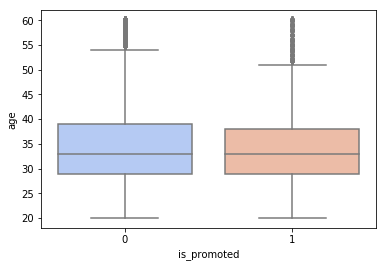

In [21]:
# age distribution 
sns.boxplot(x="is_promoted",y="age",data=train, palette="coolwarm")

(array([  870.,  7031., 13751., 12531.,  8300.,  5093.,  2861.,  1908.,
         1322.,  1141.]),
 array([20., 24., 28., 32., 36., 40., 44., 48., 52., 56., 60.]),
 <a list of 10 Patch objects>)

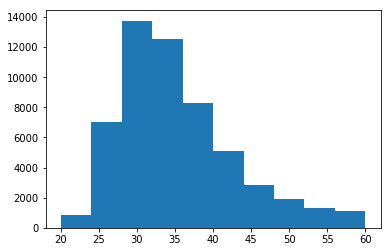

In [22]:
plt.hist(train.age)


we can observe that the age of most of the people are in range of 30-38 and there is very less number of people in lower and higher age group

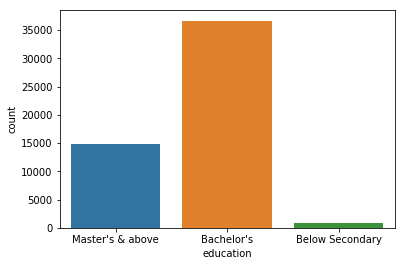

In [24]:
sns.countplot(x="education", data=trainCopy)


The education trend shows that most of the employees are Bachelor(2) and very less of them are below seconday
some of the employees are having masters and above too(1)

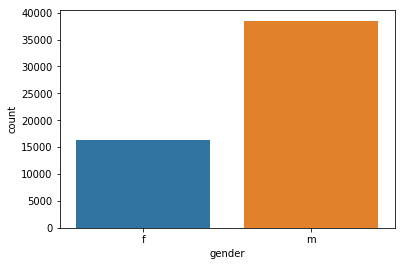

In [25]:
sns.countplot(x="gender", data=trainCopy)


1 is for males and 2 is for females

(array([  606., 11397.,  8466., 10883.,  4571.,  4652.,  4915.,  7154.,
         1801.,   363.]),
 array([39., 45., 51., 57., 63., 69., 75., 81., 87., 93., 99.]),
 <a list of 10 Patch objects>)

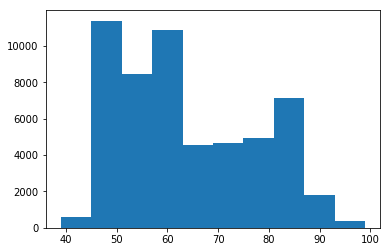

In [27]:
plt.hist(train.avg_training_score)



most of the employees are having score between 40 to 60 while some are having scores aove 80 with large no of employees 

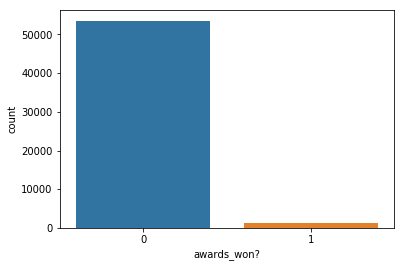

In [29]:


sns.countplot(x="awards_won?", data=trainCopy)

very less number of employee got awards 

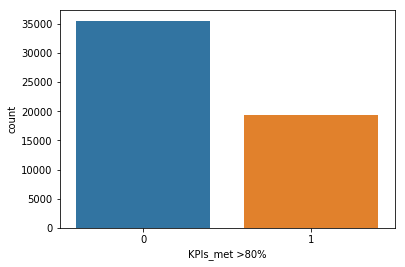

In [30]:
#plt.hist(train['KPIs_met >80%'])
sns.countplot(x="KPIs_met >80%", data=train)


(array([2.510e+04, 1.900e+04, 5.738e+03, 2.623e+03, 1.372e+03, 5.960e+02,
        2.270e+02, 9.600e+01, 5.100e+01, 5.000e+00]),
 array([ 1. ,  4.6,  8.2, 11.8, 15.4, 19. , 22.6, 26.2, 29.8, 33.4, 37. ]),
 <a list of 10 Patch objects>)

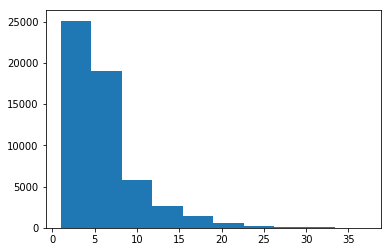

In [31]:
plt.hist(train['length_of_service'])


Text(0, 0.5, 'is promoted')

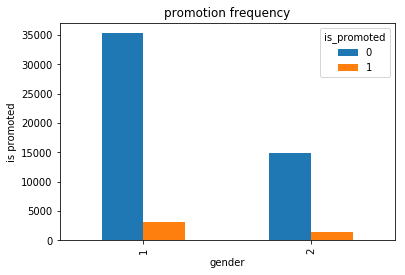

In [32]:
pd.crosstab(train.gender,train.is_promoted).plot(kind='bar')
plt.title('promotion frequency')
plt.xlabel('gender')
plt.ylabel('is promoted')

the ratio of promotion vs non promotion is amlost equal for both gender, thus as assumed the gender does not affects the promotion

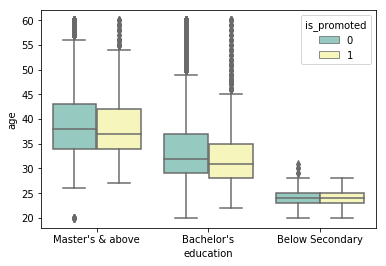

In [33]:
sns.boxplot(x="education", y="age", hue="is_promoted",data=trainCopy, palette="Set3")

we can observe that the employees having age above 35 are mostly in the higher education and people below 25 are in the below secondary education group

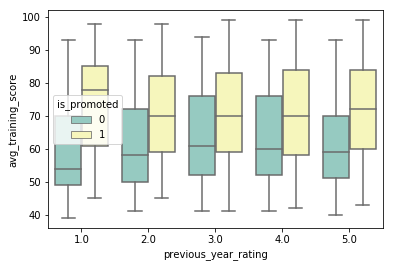

In [34]:
sns.boxplot(x="previous_year_rating", y="avg_training_score", hue="is_promoted",data=trainCopy, palette="Set3")

we can observe that alaong all the range of previous year rating, people with scores above 60% are more likely to be prmoted then the people with less score

Text(0, 0.5, 'is promoted')

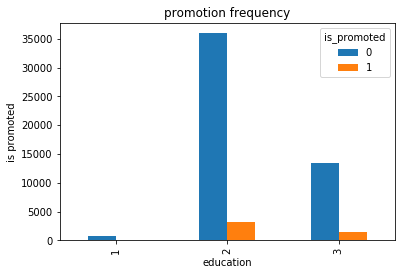

In [35]:
pd.crosstab(train.education,train.is_promoted).plot(kind='bar')
plt.title('promotion frequency')
plt.xlabel('education')
plt.ylabel('is promoted')

we can observe that almost 0 people having education below Secondary are promoted

The ratio of getting promoted is higher for people having education masters and above

Thus education surely affects the promotion

Text(0, 0.5, 'is promoted')

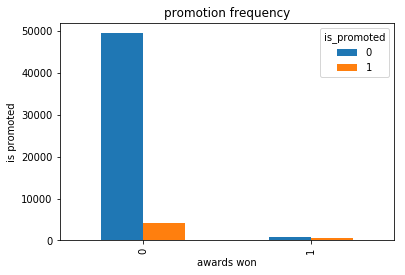

In [36]:
pd.crosstab(train['awards_won?'],train.is_promoted).plot(kind='bar')
plt.title('promotion frequency')
plt.xlabel('awards won')
plt.ylabel('is promoted')

we can observe that very less number of people won the awards but most of the people who won awards are promoted

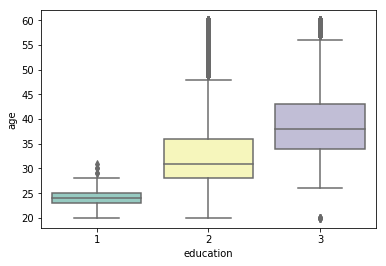

In [37]:
sns.boxplot(x="education", y="age",data=train, palette="Set3")

we can observe that most of the lower age people are in the lowest educated group
while the people in higher age group are having higher education

Text(0, 0.5, 'is promoted')

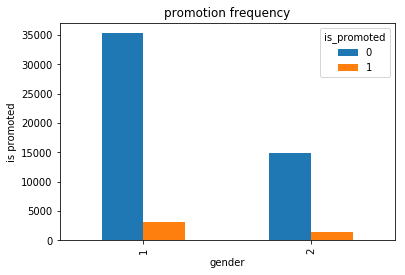

In [38]:
pd.crosstab(train.gender,train.is_promoted).plot(kind='bar')
plt.title('promotion frequency')
plt.xlabel('gender')
plt.ylabel('is promoted')

the ratio of promotion vs non promotion is amlost equal for both gender, thus as assumed the gender does not affects the promotion

Text(0, 0.5, 'is promoted')

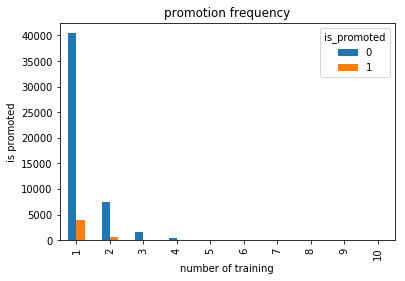

In [39]:
pd.crosstab(train.no_of_trainings,train.is_promoted).plot(kind='bar')
plt.title('promotion frequency')
plt.xlabel('number of training')
plt.ylabel('is promoted')

number ot training surely affects promotion criteria as people having large number of trainng are rarely promoted
but the effects is not so significant as ratio is similar for 1 and 2 trainings

In [40]:
train.shape

(54808, 15)

Text(0, 0.5, 'training score')

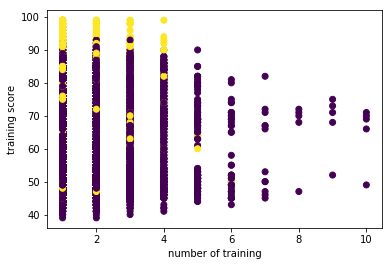

In [41]:
plt.scatter(train.no_of_trainings,train.avg_training_score,c=train.is_promoted)
plt.xlabel("number of training")
plt.ylabel("training score")

Text(0, 0.5, 'training score')

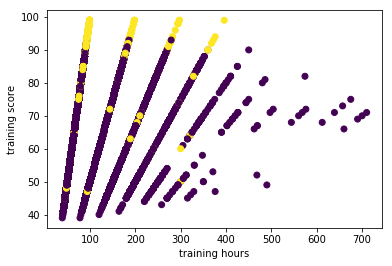

In [42]:
plt.scatter(train.training_hours,train.avg_training_score,c=train.is_promoted)
plt.xlabel("training hours")
plt.ylabel("training score")

we can observe that the training score is related to promotion as more the training score more is the chance to be promoted
also the training hours are linearly related to training score 

Text(0, 0.5, 'is promoted')

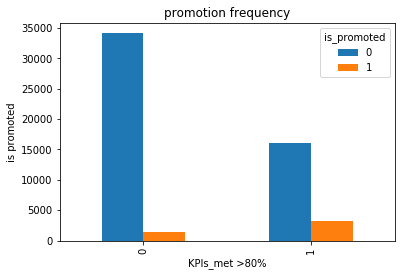

In [43]:
pd.crosstab(train['KPIs_met >80%'],train.is_promoted).plot(kind='bar')
plt.title('promotion frequency')
plt.xlabel('KPIs_met >80%')
plt.ylabel('is promoted')


In [44]:
pd.crosstab(train["KPIs_met >80%"],train["is_promoted"],margins=True)

is_promoted,0,1,All
KPIs_met >80%,,,
0,34111,1406,35517
1,16029,3262,19291
All,50140,4668,54808


16 % of the people who met condition are promoted 
3.9 % of the people who didnt met were promoted thus kpi met is surely affecting promotion

In [45]:
corr = train.corr()
corr.style.background_gradient()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,joining_age,training_hours
department,1,-0.0205925,0.0525012,0.0301084,0.00473218,0.0141517,0.0791621,-0.135561,0.0590596,-0.0882091,-0.00215111,-0.251626,0.000130116,0.0608573,-0.0968076
region,-0.0205925,1,0.00106336,-0.0197296,-0.000919649,-0.00459046,-0.0889184,-0.0059766,-0.0589394,-0.00766378,0.000307275,0.0235718,0.00884144,-0.0737752,0.00467944
education,0.0525012,0.00106336,1,0.0243486,-0.00552099,-0.0334406,0.389036,0.0268517,0.266995,0.00676087,0.0004684,0.0256455,0.0280264,0.316102,-0.0218387
gender,0.0301084,-0.0197296,0.0243486,1,-0.00656724,-0.0845012,0.0162932,0.0240241,0.0196745,0.0374003,-0.00238149,0.0244942,0.0111091,0.00702044,-0.0664722
recruitment_channel,0.00473218,-0.000919649,-0.00552099,-0.00656724,1,-0.0104051,-0.0114003,0.00573072,-0.00288686,-0.000297411,-0.00551036,-0.00241588,0.00222871,-0.012878,-0.0096758
no_of_trainings,0.0141517,-0.00459046,-0.0334406,-0.0845012,-0.0104051,1,-0.0812779,-0.0615637,-0.0572748,-0.0455757,-0.00762832,0.042517,-0.0248959,-0.0649465,0.901878
age,0.0791621,-0.0889184,0.389036,0.0162932,-0.0114003,-0.0812779,1,0.0268104,0.657111,-0.0255918,-0.00816882,-0.0483797,-0.0171659,0.833896,-0.0907978
previous_year_rating,-0.135561,-0.0059766,0.0268517,0.0240241,0.00573072,-0.0615637,0.0268104,1,0.0235044,0.337367,0.0265866,0.0719257,0.15323,0.0180467,-0.012217
length_of_service,0.0590596,-0.0589394,0.266995,0.0196745,-0.00288686,-0.0572748,0.657111,0.0235044,1,-0.0776925,-0.0399275,-0.0381222,-0.0106699,0.131927,-0.0664172
KPIs_met >80%,-0.0882091,-0.00766378,0.00676087,0.0374003,-0.000297411,-0.0455757,-0.0255918,0.337367,-0.0776925,1,0.0969998,0.078391,0.221582,0.023232,-0.00367623


# checking hypothesis

In [46]:
pd.crosstab(train["education"],train["is_promoted"],margins=True)


is_promoted,0,1,All
education,,,
1,738,67,805
2,35948,3130,39078
3,13454,1471,14925
All,50140,4668,54808


In [47]:
pd.crosstab(train["gender"],train["is_promoted"],margins=True)


is_promoted,0,1,All
gender,,,
1,35295,3201,38496
2,14845,1467,16312
All,50140,4668,54808


gender map is 1=male, 2 = female we can observe  (8 % of women are promoted)
while same 8 % of men are promoted 

In [48]:
pd.crosstab(train["no_of_trainings"],train["is_promoted"],margins=True)

is_promoted,0,1,All
no_of_trainings,,,
1,40468,3910,44378
2,7382,605,7987
3,1654,122,1776
4,442,26,468
5,125,3,128
6,42,2,44
7,12,0,12
8,5,0,5
9,5,0,5


we can observe that lesser the number of training more is the chance of getting promoted

In [49]:
pd.crosstab(train["age"],train["is_promoted"],margins=True)

is_promoted,0,1,All
age,,,
20,109,4,113
21,93,5,98
22,213,18,231
23,394,34,428
24,775,70,845
25,1230,69,1299
26,1897,163,2060
27,2566,261,2827
28,2839,308,3147


people in age range 26-40 are more likely to be prmoted than of other age group

In [50]:
pd.crosstab(train["previous_year_rating"],train["is_promoted"],margins=True)

is_promoted,0,1,All
previous_year_rating,,,
1.0,6135,88,6223
2.0,4044,181,4225
3.0,21048,1694,22742
4.0,9093,784,9877
5.0,9820,1921,11741
All,50140,4668,54808


16.3% of 5 star

7.9 % of 4 star

7.4% of 3 star

4.2% of 2 star

1.4 % of 1 star 





In [51]:

pd.crosstab(train["awards_won?"],train["is_promoted"],margins=True)

is_promoted,0,1,All
awards_won?,,,
0,49429,4109,53538
1,711,559,1270
All,50140,4668,54808


559/1270 = 44% of the people who got award are promoted

4109/53524 = 7.6 % of the people who were not awarded got promoted

# Feature selection 

As the data is imbalnce we have to apply certain techniques for making the model fit accurately for the imbalance output
as the data contains large number of target variables labled as 0, it will try to predict 0 for most of the cases.
we will do the feature selection before any over/undersampling technique because as we over/ undersample , the feature importance may 
change from the original importance of the feature.

Oversampling the minority class with SMOTE violates the independence assumption.